In [75]:
import numpy as np
import scipy.misc
import cv2  # using opencv as I am not too familiar w/ scipy yet, sorry 
import matplotlib.pyplot as plt
import pyexr
import seaborn as sns

%matplotlib notebook

def laplace_of_gaussian(gray_img, sigma=1.5, kappa=0.75, pad=False):
    """
    Applies Laplacian of Gaussians to grayscale image.

    :param gray_img: image to apply LoG to
    :param sigma:    Gauss sigma of Gaussian applied to image, <= 0. for none
    :param kappa:    difference threshold as factor to mean of image values, <= 0 for none
    :param pad:      flag to pad output w/ zero border, keeping input image size
    """
    assert len(gray_img.shape) == 2
    img = cv2.GaussianBlur(gray_img, (0, 0), sigma) if 0. < sigma else gray_img
    
    img = cv2.Laplacian(img, cv2.CV_64F)
    
    #return img
    
    rows, cols = img.shape[:2]
    # min/max of 3x3-neighbourhoods
    min_map = np.minimum.reduce(list(img[r:rows-2+r, c:cols-2+c]
                                     for r in range(3) for c in range(3)))
    max_map = np.maximum.reduce(list(img[r:rows-2+r, c:cols-2+c]
                                     for r in range(3) for c in range(3)))
    # bool matrix for image value positiv (w/out border pixels)
    pos_img = 0 < img[1:rows-1, 1:cols-1]
    # bool matrix for min < 0 and 0 < image pixel
    neg_min = min_map < 0
    neg_min[1 - pos_img] = 0
    # bool matrix for 0 < max and image pixel < 0
    pos_max = 0 < max_map
    pos_max[pos_img] = 0
    # sign change at pixel?
    zero_cross = neg_min + pos_max
    # values: max - min, scaled to 0--255; set to 0 for no sign change
    value_scale = 255. / max(1., img.max() - img.min())
    values = value_scale * (max_map - min_map)
    values[1 - zero_cross] = 0.
    # optional thresholding
    if 0. <= kappa:
        thresh = float(np.absolute(img).mean()) * kappa
        values[values < thresh] = 0.
    log_img = values.astype(np.uint8)
    if pad:
        log_img = np.pad(log_img, pad_width=1, mode='constant', constant_values=0)
    return log_img

In [76]:
a = pyexr.read_all('0000000004.exr')['default'][:,:,0].astype(np.float64)
b = pyexr.read_all('Sibenik0000000004.exr')['default'][:,:,0].astype(np.float64)


In [77]:
c = laplace_of_gaussian(a)
d = laplace_of_gaussian(b)

t = np.abs(c - d)/255.0


<IPython.core.display.Javascript object>


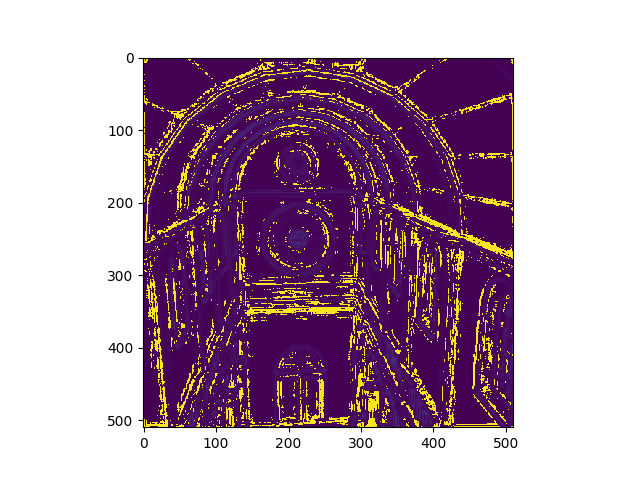

In [78]:
plt.imshow(t)

In [39]:
np.mean(t)

33.98444828911957

In [40]:
f = np.abs(a - b)

In [66]:
plt.imshow(f)

In [42]:
np.mean(f)

0.07667785566252405

In [53]:
z = t.flatten()

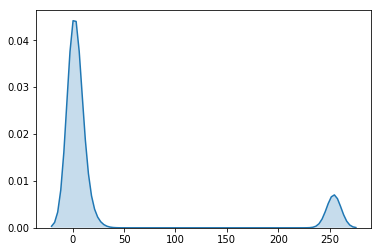

In [57]:
sns.kdeplot(z, shade=True)

In [61]:
np.mean(z)

33.98444828911957